In [1]:
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

(128, 128, 4)
(128, 128, 4)
(128, 128, 4)
(128, 128, 4)
(128, 128, 4)
(128, 128, 4)
(128, 128, 4)
(128, 128, 4)
(128, 128, 4)


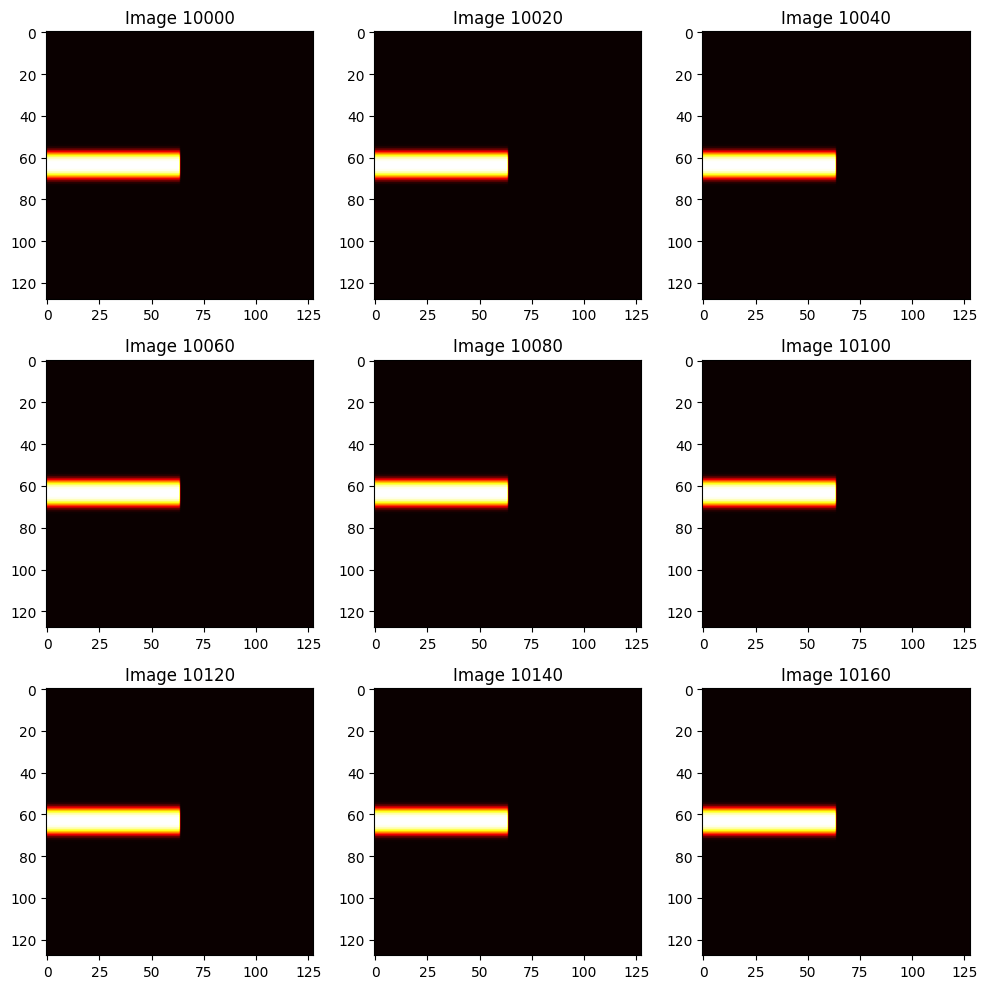

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
image_height=128
image_width=128
def makeThermography(a):
    x = np.linspace(-1, 1, image_width)
    y = np.linspace(-1, 1, image_height)
    X, Y = np.meshgrid(x, y)

    gradient = np.exp(-a*Y**4)
    left_half_mask = X <= 0
    thermographic_image = np.zeros_like(gradient)
    thermographic_image[left_half_mask] = gradient[left_half_mask]

    return thermographic_image

i = -1
j = 0
for a in range(10000, 10200, 20):
    if(j==0):
        i = (i + 1) 
    if(i>2):
        break
    result_image = makeThermography(a=a)
    rgb_image = plt.cm.hot(result_image)
    print(rgb_image.shape)
    axs[i, j].imshow(result_image, cmap='hot')
    axs[i, j].set_title(f'Image {a}')
    j = (j + 1) % 3
    plt.cm.hot(result_image)

plt.tight_layout()
plt.show()



In [13]:
rgb_image.shape

(128, 128, 4)

In [6]:
rgb_img = np.zeros((128, 128, 3), dtype=np.uint8)

rgb_img[:, :, 0] = result_image
rgb_img[:, :, 1] = result_image
rgb_img[:, :, 2] = result_image

print(rgb_img.shape)

(128, 128, 3)


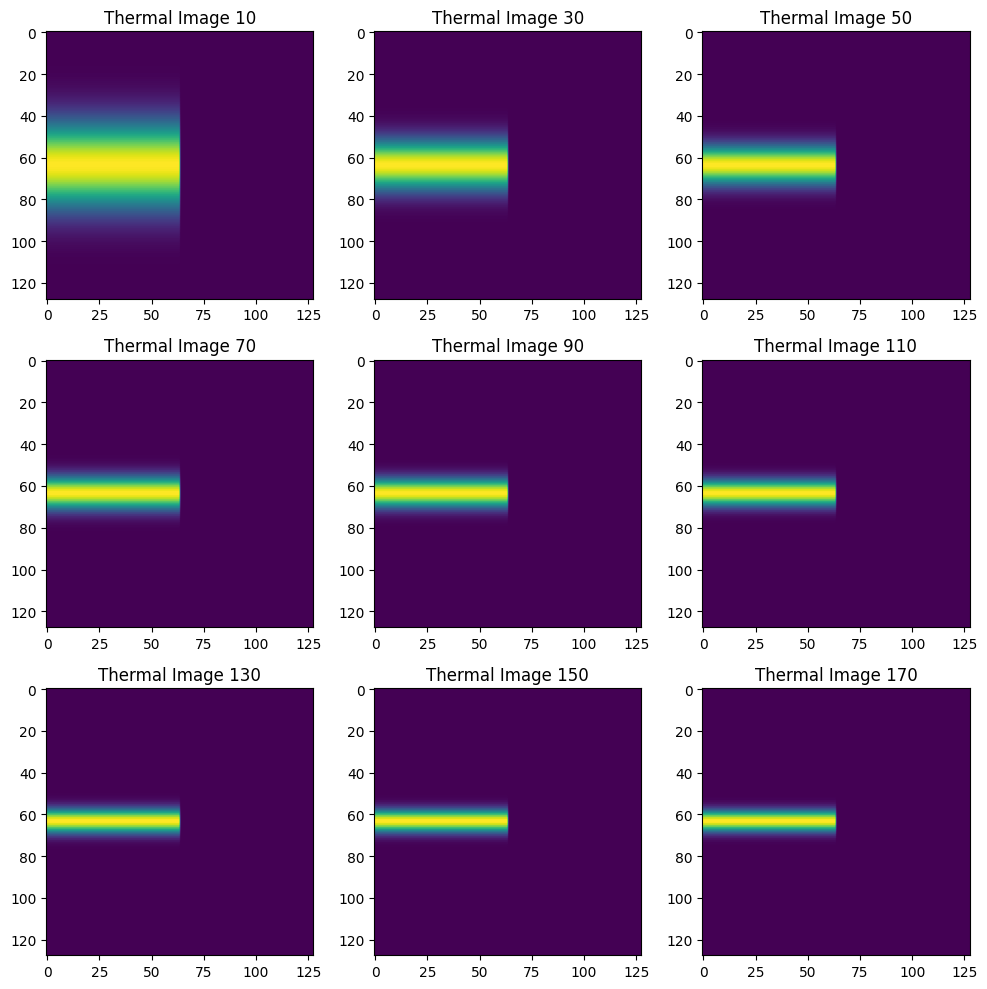

Saved: ./thermal_image.jpg


In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def makeThermography(a):
    x = np.linspace(-1, 1, image_width)
    y = np.linspace(-1, 1, image_height)
    X, Y = np.meshgrid(x, y)

    gradient = np.exp(-a*Y**2)
    left_half_mask = X <= 0
    thermographic_image = np.zeros_like(gradient)
    thermographic_image[left_half_mask] = gradient[left_half_mask]

    return thermographic_image

def rgb_to_thermal(rgb_image):
    rgb_normalized = rgb_image / 255.0
    thermal_array = np.zeros_like(rgb_normalized, dtype=np.float32)
    thermal_array[:, :, 0] = 0.5 * rgb_normalized[:, :, 0]  # Red channel
    thermal_array[:, :, 1] = 0.0  # Green channel
    thermal_array[:, :, 2] = 0.5 * (1 - rgb_normalized[:, :, 0])  # Blue channel

    thermal_image = (thermal_array * 255).astype(np.uint8)
    return thermal_image

image_height = 128
image_width = 128

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

i = -1
j = 0
for a in range(10, 300, 20):
    if j == 0:
        i = (i + 1)
    if i > 2:
        break
    result_image = makeThermography(a=a)
    axs[i, j].imshow(result_image)
    axs[i, j].set_title(f'Thermal Image {a}')
    j = (j + 1) % 3


plt.tight_layout()
plt.show()

# Save the simulated thermal image
thermal_image_path = './thermal_image.jpg'
cv2.imwrite(thermal_image_path, result_image)

print(f'Saved: {thermal_image_path}')


In [40]:
result_image.shape

(128, 128)